In [1]:
!pip install pandas_datareader

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime 
from pandas_datareader import data

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 금융데이터는 주로 웹에 있음
# 크롤링을 하지 않아도 기본적인 금융 데이터를 제공 받을 수 있는 것이 !pip install pandas_datareader

### datetime 표준 라이브러리

In [3]:
# 년, 월, 일, 시, 분, 초

dt = datetime(1999, 12, 23, 5, 12, 13)
dt

datetime.datetime(1999, 12, 23, 5, 12, 13)

In [7]:
print(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

1999 12 23 5 12 13


In [8]:
# 현재 시간 - 정적 메소드

cur = datetime.now()
cur

datetime.datetime(2020, 12, 29, 10, 32, 2, 352594)

In [13]:
print(type(cur)) # datetime

<class 'datetime.datetime'>


# 시계열 데이터의 정의
### 1. 인덱스가 datetime형
### 2. 시계열 데이터의 indexing, slicing을 사용 가능

In [57]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
# df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
#           datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
#           datetime(2019,7,1),datetime(2019,8,1) ]
df


,0,1
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [59]:
df.columns = ['A', 'B']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


#### 이동평균

In [61]:
# rolling은 이동평균을 구할 때 사용

# window=2 -> 두 개씩 평균값을 구하겠다 - 세로로 두 개씩의 평균

df.rolling(window=2).mean()

,A,B
2019-01-01,NaN,NaN
2019-02-01,2.0,3.0
2019-03-01,4.0,6.0
2019-04-01,6.0,7.0
2019-05-01,8.0,9.0
2019-06-01,10.0,11.0
2019-07-01,12.0,13.0
2019-08-01,14.0,18.0


In [63]:
# min_periods=1 NaN 말고 자기 자신 값이 나옴
# 일반적으로는 NaN을 놔둠
 
df.rolling(window=3, min_periods=1).mean()

,A,B
2019-01-01,1.0,2.000000
2019-02-01,2.0,3.000000
2019-03-01,3.0,4.666667
2019-04-01,5.0,6.000000
2019-05-01,7.0,8.666667
2019-06-01,9.0,9.333333
2019-07-01,11.0,12.666667
2019-08-01,13.0,15.333333


In [64]:
df.rolling(window=3).mean()['B']

2019-01-01          NaN
2019-02-01          NaN
2019-03-01     4.666667
2019-04-01     6.000000
2019-05-01     8.666667
2019-06-01     9.333333
2019-07-01    12.666667
2019-08-01    15.333333
Name: B, dtype: float64

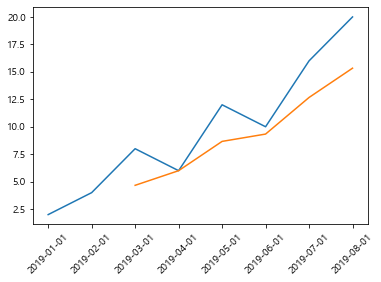

In [66]:
plt.xticks(rotation=45)
plt.plot(df.index, df['B'])
plt.plot(df.index, df.rolling(window=3).mean()['B']) # 오랜지색 - 추세선 도출 가능
plt.show()

In [16]:
df.index # object 문자열 -> 시계열 데이터가 아님

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object')

In [14]:
data = [[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16]]
df = pd.DataFrame( data)
# df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
#           '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
          datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
          datetime(2019,7,1),datetime(2019,8,1) ]
df

,0,1
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,6
2019-04-01,7,8
2019-05-01,9,10
2019-06-01,11,12
2019-07-01,13,14
2019-08-01,15,16


### 문자열을 datetime형으로 형 변환

In [17]:
# pd.to_datetime 함수 사용 : 문자형 -> datetime형

df.index = pd.to_datetime(df.index)

In [18]:
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

### 년-월-일
### 2019-11-20 혹은 2019/11/20은 에러가 나지 않지만
### 2019년 11월 20일로 되어 있는 경우 에러가 남 -> 포맷을 맞춰줘야 함

In [19]:
df.index=['2019년1월1일','2019년2월1일','2019년3월1일','2019년4월1일',
          '2019년5월1일','2019년6월1일','2019년7월1일','2019년8월1일']

In [20]:
df.index

Index(['2019년1월1일', '2019년2월1일', '2019년3월1일', '2019년4월1일', '2019년5월1일',
       '2019년6월1일', '2019년7월1일', '2019년8월1일'],
      dtype='object')

In [21]:
df.inidex = pd.to_datetime(df.index) # 에러

ParserError: Unknown string format: 2019년1월1일

날짜 포맷 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavio

In [23]:
df.index = pd.to_datetime(df.index, format='%Y년%m월%d일')

In [24]:
df.index 

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

# 주식 데이터 가져오기
### 크롤링 안하고 라이브러리 이용 

In [26]:
# data.get_data_yahoo(종목코드, 시작날짜, 끝날짜)
# 끝날짜 생략하면 오늘 날짜까지
# 삼성전자 종목코드 : 005930 / 코스피

samsungDF = data.get_data_yahoo('005930.KS', '2017-01-01')
samsungDF

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,7630.107910
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,7710.425293
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,7642.790527
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,7515.973145
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,7651.245117
...,...,...,...,...,...,...
2020-12-22,73200.0,72100.0,72500.0,72300.0,16304910.0,72300.000000
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,73900.000000
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,77800.000000


In [27]:
samsungDF.index # datetime64 -> 시계열 데이터

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-28', '2020-12-29'],
              dtype='datetime64[ns]', name='Date', length=973, freq=None)

In [29]:
samsungDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 973 entries, 2017-01-02 to 2020-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       973 non-null    float64
 1   Low        973 non-null    float64
 2   Open       973 non-null    float64
 3   Close      973 non-null    float64
 4   Volume     973 non-null    float64
 5   Adj Close  973 non-null    float64
dtypes: float64(6)
memory usage: 53.2 KB


In [68]:
samsungDF.rolling(window=20).mean()['Close']

Date
2017-01-02        NaN
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
               ...   
2020-12-22    71290.0
2020-12-23    71655.0
2020-12-24    72145.0
2020-12-28    72670.0
2020-12-29    73235.0
Name: Close, Length: 973, dtype: float64

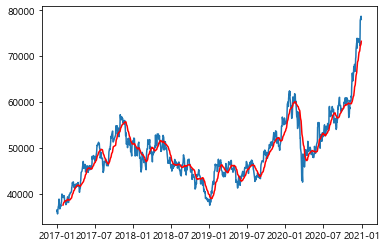

In [70]:
# y를 지정 안하면 모든 칼럼에 대해서 그래프가 찍힘

# samsungDF.plot(y='Close')

plt.plot(samsungDF.index, samsungDF['Close'])
plt.plot(samsungDF.index, 
         samsungDF.rolling(window=20).mean()['Close'], 'r-') # 추세선
plt.show()

##### 시계열데이터만 적용되는 인덱싱 슬라이싱

In [32]:
# 2019년도만 가져옴 - 원래는 칼럼명을 적는 자리인데
# 인덱스가 datetime인 시계열 데이터만 적용되는 독특한 인덱싱 

samsungDF['2019']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0
...,...,...,...,...,...,...
2019-12-23,56400.0,55100.0,56100.0,55500.0,9839252.0,55500.0
2019-12-24,55700.0,54800.0,55600.0,55000.0,11868463.0,55000.0
2019-12-26,55400.0,54400.0,54700.0,55400.0,9645034.0,55400.0


In [33]:
samsungDF['2019-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0
2019-01-09,39600.0,38300.0,38650.0,39600.0,17452708.0,39600.0
2019-01-10,40150.0,39600.0,40000.0,39800.0,14731699.0,39800.0
2019-01-11,40550.0,39950.0,40350.0,40500.0,11661063.0,40500.0
2019-01-14,40700.0,39850.0,40450.0,40050.0,11984996.0,40050.0


In [34]:
samsungDF['2019-01':'2019-07']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,38750.0
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,37600.0
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,37450.0
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,38750.0
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,38100.0
...,...,...,...,...,...,...
2019-07-25,47200.0,46600.0,47150.0,47200.0,8408838.0,47200.0
2019-07-26,47150.0,46550.0,46650.0,47150.0,7873886.0,47150.0
2019-07-29,47050.0,46000.0,46800.0,46100.0,6856846.0,46100.0


In [35]:
samsungDF[:'2018']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,7630.107910
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,7710.425293
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,7642.790527
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,7515.973145
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,7651.245117
...,...,...,...,...,...,...
2018-12-21,38650.0,38100.0,38200.0,38650.0,14947080.0,38293.230469
2018-12-24,39050.0,38300.0,38500.0,38800.0,9729530.0,38441.843750
2018-12-26,38750.0,38300.0,38400.0,38350.0,12707675.0,37996.000000


In [36]:
# 인덱스의 년도만 뽑을 수 있음

samsungDF.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=973)

In [37]:
# 인덱스의 월

samsungDF.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=973)

In [39]:
samsungDF['year'] = samsungDF.index.year

In [40]:
samsungDF

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,7630.107910,2017
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,7710.425293,2017
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,7642.790527,2017
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,7515.973145,2017
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,7651.245117,2017
...,...,...,...,...,...,...,...
2020-12-22,73200.0,72100.0,72500.0,72300.0,16304910.0,72300.000000,2020
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,73900.000000,2020
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,77800.000000,2020


In [41]:
# g = samsungDF.groupby('year')
# g.mean()

samsungDF.groupby('year').mean() # 각 년도별 평균값

,High,Low,Open,Close,Volume,Adj Close
year,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,13143.165121
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,41784.777424
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,46557.959184
2020,57733.198381,56415.182186,57062.753036,57070.040486,2.165909e+07,57070.040486


In [42]:
# 이렇게 간단하게 
# 연도별 평균을 볼 수 있음

samsungDF.groupby(samsungDF.index.year).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,13143.165121,2017
2018,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,41784.777424,2018
2019,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,46557.959184,2019
2020,57733.198381,56415.182186,57062.753036,57070.040486,2.165909e+07,57070.040486,2020


In [43]:
# 월별 평균

samsungDF.groupby(samsungDF.index.month).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
1,47377.469880,46307.831325,46838.915663,46865.301205,1.424406e+07,34957.848245,2018.506024
2,48423.600000,47387.333333,47881.333333,47878.000000,1.480051e+07,35472.499062,2018.493333
3,47020.235294,45795.764706,46360.823529,46441.411765,1.798071e+07,33842.387305,2018.494118
4,47254.337349,46304.216867,46808.433735,46829.759036,1.365878e+07,38983.022061,2018.506024
5,47677.974684,46709.873418,47244.556962,47138.101266,1.551114e+07,38655.357459,2018.506329
6,48795.802469,47807.283951,48286.172840,48336.543210,1.476253e+07,39116.307473,2018.518519
7,49636.067416,48765.393258,49245.168539,49165.842697,1.188592e+07,40789.269948,2018.539326
8,48762.588235,47853.529412,48369.647059,48258.588235,1.257806e+07,39541.721530,2018.458824
9,51135.324675,50260.000000,50651.428571,50749.090909,1.344413e+07,41489.534180,2018.532468


In [45]:
# 년도별 월별

samsungDF.groupby([samsungDF.index.year, samsungDF.index.month]).mean()

High           Low          Open         Close  \
Date Date                                                           
2017 1     37826.000000  37079.000000  37340.000000  37486.000000   
     2     38912.000000  38276.000000  38578.000000  38571.000000   
     3     41447.272727  40740.909091  40890.000000  41166.363636   
     4     42261.000000  41549.000000  41910.000000  41959.000000   
     5     46040.000000  45188.421053  45590.526316  45550.526316   
     6     46869.523810  46216.190476  46460.952381  46574.285714   
     7     49745.714286  48939.047619  49334.285714  49393.333333   
     8     47323.636364  46495.454545  47096.363636  46858.181818   
     9     50516.000000  49716.000000  50023.000000  50214.000000   
     10    54593.750000  53442.500000  53997.500000  53961.250000   
     11    56005.000000  54952.000000  55669.000000  55366.000000   
     12    51328.888889  50258.888889  50790.000000  50733.333333   
2018 1     50688.571429  49367.619048  50108.571429  49933.333333   
     2     48043.333333  46793.333333  47413.333333  47248.888889   
     3     50141.904762  49035.238095  49611.428571  49683.809524   
     4     50606.666667  49520.000000  50019.047619  50163.809524   
     5     51835.000000  50647.500000  51407.500000  51102.500000   
     6     48905.263158  47907.894737  48526.315789  48371.052632   
     7     46704.545455  45890.909091  46320.454545  46220.454545   
     8     46229.545455  45431.818182  45763.636364  45947.727273   
     9     46476.470588  45620.588235  46076.470588  46064.705882   
     10    44169.047619  43133.333333  43614.285714  43600.000000   
     11    43807.142857  42857.142857  43366.666667  43390.476190   
     12    40260.526316  39515.789474  39813.157895  39826.315789   
2019 1     41902.272727  40970.454545  41415.909091  41600.000000   
     2     46779.411765  45861.764706  46370.588235  46308.823529   
     3     45010.000000  44072.500000  44542.500000  44560.000000   
     4     46490.909091  45611.363636  46088.636364  46061.363636   
     5     43573.809524  42602.380952  43123.809524  43023.809524   
     6     45057.894737  44357.894737  44663.157895  44865.789474   
     7     46619.565217  45865.217391  46276.086957  46215.217391   
     8     44254.761905  43483.333333  43871.428571  43840.476190   
     9     47526.315789  46750.000000  47089.473684  47294.736842   
     10    50376.190476  49516.666667  49933.333333  49880.952381   
     11    52655.000000  51730.000000  52270.000000  52195.000000   
     12    53982.500000  53002.500000  53495.000000  53507.500000   
2020 1     59475.000000  58195.000000  58870.000000  58815.000000   
     2     59675.000000  58330.000000  58890.000000  59085.000000   
     3     51440.909091  49325.000000  50381.818182  50331.818182   
     4     49567.500000  48445.000000  49127.500000  49045.000000   
     5     49476.315789  48626.315789  49071.052632  49100.000000   
     6     53768.181818  52218.181818  52950.000000  52986.363636   
     7     55356.521739  54256.521739  54930.434783  54726.086957   
     8     57865.000000  56600.000000  57360.000000  56980.000000   
     9     58761.904762  57709.523810  58176.190476  58176.190476   
     10    60242.105263  59263.157895  59836.842105  59736.842105   
     11    64019.047619  62476.190476  63090.476190  63419.047619   
     12    73880.000000  72375.000000  72850.000000  73235.000000   

                 Volume     Adj Close  year  
Date Date                                    
2017 1     1.102530e+07   7923.053906  2017  
     2     1.192612e+07   8152.379785  2017  
     3     1.193883e+07   8861.774814  2017  
     4     1.191310e+07  10653.381592  2017  
     5     1.358061e+07  11565.269583  2017  
     6     1.101470e+07  12023.746791  2017  
     7     1.058194e+07  14697.878627  2017  
     8     1.218491e+07  13943.498136  2017  
     9     1.014741e+07  15181.102881  2017  
     10    1.062720e+07  18572.812134  2017  
     11    1.085

In [48]:
# resample : 시계열 데이터 전용 집계함수 -> rule에 따라서 집계를 해 줌
# 약어를 문자열로 주면 됨
# 그룹바이 대신 사용가능

# rule - 워드 파일 참고
# A : year end frequency

# 각 연말별 평균값

samsungDF.resample('A').mean()
# samsungDF.groupby(samsungDF.index.year).mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-12-31,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,13143.165121,2017
2018-12-31,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,41784.777424,2018
2019-12-31,46965.306122,46098.571429,46541.632653,46557.959184,1.089198e+07,46557.959184,2019
2020-12-31,57733.198381,56415.182186,57062.753036,57070.040486,2.165909e+07,57070.040486,2020


In [49]:
# 각 연도의 월말별
# M : month end frequency

samsungDF.resample('M').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-31,37826.000000,37079.000000,37340.000000,37486.000000,1.102530e+07,7923.053906,2017
2017-02-28,38912.000000,38276.000000,38578.000000,38571.000000,1.192612e+07,8152.379785,2017
2017-03-31,41447.272727,40740.909091,40890.000000,41166.363636,1.193883e+07,8861.774814,2017
2017-04-30,42261.000000,41549.000000,41910.000000,41959.000000,1.191310e+07,10653.381592,2017
2017-05-31,46040.000000,45188.421053,45590.526316,45550.526316,1.358061e+07,11565.269583,2017
2017-06-30,46869.523810,46216.190476,46460.952381,46574.285714,1.101470e+07,12023.746791,2017
2017-07-31,49745.714286,48939.047619,49334.285714,49393.333333,1.058194e+07,14697.878627,2017
2017-08-31,47323.636364,46495.454545,47096.363636,46858.181818,1.218491e+07,13943.498136,2017
2017-09-30,50516.000000,49716.000000,50023.000000,50214.000000,1.014741e+07,15181.102881,2017


In [50]:
# 각 연도의 주간 - 월요일~일요일까지 주간별 집계
# W : weekly frequency - 일요일 기준

samsungDF.resample('W').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-08,36376.0,35916.0,36200.0,36100.0,7965680.00,7630.108398,2017.0
2017-01-15,38116.0,37300.0,37500.0,37800.0,12387290.00,7989.421289,2017.0
2017-01-22,37624.0,36684.0,37064.0,37048.0,10448300.00,7830.478027,2017.0
2017-01-29,39010.0,38155.0,38270.0,38880.0,12126875.00,8217.690063,2017.0
2017-02-05,39680.0,39220.0,39610.0,39350.0,14389562.50,8317.029785,2017.0
...,...,...,...,...,...,...,...
2020-12-06,69880.0,68300.0,68880.0,69040.0,29530130.60,69040.000000,2020.0
2020-12-13,73580.0,72220.0,72580.0,72960.0,27187686.00,72960.000000,2020.0
2020-12-20,74100.0,73100.0,73640.0,73540.0,20358482.00,73540.000000,2020.0


In [51]:
# W-MON : 월요일 기준 (화요일~월요일)

samsungDF.resample('W-MON').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-01-02,36240.000000,35880.0,35980.000000,36100.000000,4.650600e+06,7630.107910,2017.0
2017-01-09,36628.000000,36052.0,36324.000000,36324.000000,9.674540e+06,7677.453223,2017.0
2017-01-16,38180.000000,37252.0,37552.000000,37688.000000,1.307061e+07,7965.748926,2017.0
2017-01-23,37672.000000,36820.0,37132.000000,37328.000000,8.888080e+06,7889.658887,2017.0
2017-01-30,39326.666667,38540.0,38626.666667,39153.333333,1.323237e+07,8275.461914,2017.0
...,...,...,...,...,...,...,...
2020-12-07,70860.000000,69340.0,69680.000000,70280.000000,2.646603e+07,70280.000000,2020.0
2020-12-14,73780.000000,72480.0,72820.000000,73140.000000,2.579167e+07,73140.000000,2020.0
2020-12-21,73880.000000,72860.0,73540.000000,73380.000000,2.012987e+07,73380.000000,2020.0


In [53]:
# 년도별 분기별 집계
# Q : quarter end frequency

samsungDF.resample('Q').mean()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2017-03-31,39461.290323,38764.516129,38999.032258,39141.935484,1.164004e+07,8330.124512,2017
2017-06-30,45070.666667,44335.000000,44668.333333,44711.666667,1.212670e+07,11421.773942,2017
2017-09-30,49144.444444,48332.380952,48771.428571,48768.571429,1.100376e+07,14587.848695,2017
2017-12-31,54028.148148,52940.370370,53547.407407,53405.555556,1.116375e+07,18896.441479,2017
2018-03-31,49703.666667,48479.000000,49126.000000,49040.666667,1.534626e+07,31052.067253,2018
2018-06-30,50477.333333,49385.333333,50009.166667,49909.000000,1.393414e+07,48727.975651,2018
2018-09-30,46469.672131,45650.000000,46051.639344,46078.688525,9.944799e+06,45323.787205,2018
2018-12-31,42827.049180,41911.475410,42345.081967,42352.459016,1.123298e+07,41973.156442,2018
2019-03-31,44361.016949,43431.355932,43903.389831,43960.169492,1.220284e+07,43960.169492,2019
